# <font color=blue>Assignments for "Overfitting and Regularization"</font>

In this assignment, you'll continue working with the house prices data. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

- Load the **houseprices** data from Kaggle.
- Reimplement your model from the previous lesson.
- Try OLS, Lasso, Ridge and ElasticNet regressions using the same model specification. This time, you need to do **k-fold cross-validation** to choose the best hyperparameter values for your models. Which model is the best? Why?

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import matplotlib.pyplot as plt

In [2]:
house_df = pd.read_csv('housePrices.csv')
house_df.Alley = house_df.Alley.fillna("No Alley Access")
house_df.FireplaceQu = house_df.FireplaceQu.fillna("No Fireplace")
house_df.PoolQC = house_df.PoolQC.fillna("No pool")
house_df.Fence = house_df.Fence.fillna("No fence")
house_df.MiscFeature = house_df.MiscFeature.fillna("None")

#Filling missing values per columns with median values
import pandas.api.types as ptypes
def fix_missing(df, col, name):
    if ptypes.is_numeric_dtype(col):
        df[name] = col.fillna(col.median())
        
for n, c in house_df.items():
        fix_missing(house_df, c, n)
        
house_df = house_df.dropna()

#Getting categoric columns from dataframe and removing customerid which is unique for each customer.
categoricColumns = house_df.select_dtypes('object').columns.tolist()
categoricColumns.pop(0)
len(categoricColumns)

#Creating a new dataframe to concat new numerical columns on. 
numeric_df = pd.DataFrame()
#By using a loop concating all columns in a df
for var in categoricColumns:
    numeric_df = pd.concat([numeric_df, pd.get_dummies(house_df[var], prefix=var)], axis=1)
numeric_df

#Adding numerical columns and original dataframe to new df.
new_house_df = pd.concat([house_df, numeric_df], axis=1)
new_house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,RL,65.0,8450,Pave,No Alley Access,Reg,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0
1,2,20,RL,80.0,9600,Pave,No Alley Access,Reg,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0
2,3,60,RL,68.0,11250,Pave,No Alley Access,IR1,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0
3,4,70,RL,60.0,9550,Pave,No Alley Access,IR1,Lvl,AllPub,...,0,0,0,1,1,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,No Alley Access,IR1,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0


In [3]:
#Adding columns that has more than 0.33 or more correlation between target variable.
chosenColumns2 = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1','1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars','Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'ExterQual_Ex', 'ExterQual_Gd', 'BsmtQual_Ex', 'KitchenQual_Ex']

y = new_house_df.SalePrice
X = new_house_df[chosenColumns2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 1) Using OLS 

In [4]:
X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     315.5
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:30:04   Log-Likelihood:                -12711.
No. Observations:                1070   AIC:                         2.545e+04
Df Residuals:                    1054   BIC:                         2.553e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -9.34e+05   1.49e+05     -6.269      0.000   -1.23e+06   -6.42e+05
OverallQual           1.284e+04   1484.911      8.644      0.000    9921.662    1.57e+04
YearBuilt              163.8105     54.384      3.012      0.003      57.098     270.523
YearRemodAdd           294.8959     74.353      3.966      0.000     149.000     440.792
BsmtFinSF1              10.9986      2.767      3.976      0.000       5.570      16.427
1stFlrSF                14.7080      3.844      3.826      0.000       7.164      22.252
GrLivArea               36.8260      4.584      8.033      0.000      27.830      45.822
TotRmsAbvGrd          1719.8618   1267.326      1.357      0.175    -766.908    4206.631
Fireplaces            9886.0191   1975.905      5.003      0.000    6008.864    1.38e+04
GarageCars            1.314e+04   2337.862      5.620      0.000    8551.332    1.77e+04
Neighborhood_NoRidge  5.763e+04   7039.402      8.187      0.000    4.38e+04    7.14e+04
Neighborhood_NridgHt  1.283e+04   5401.686      2.376      0.018    2234.704    2.34e+04
ExterQual_Ex          2.206e+04   7745.419      2.848      0.004    6860.884    3.73e+04
ExterQual_Gd          7934.6370   3383.650      2.345      0.019    1295.180    1.46e+04
BsmtQual_Ex           3.769e+04   5155.024      7.312      0.000    2.76e+04    4.78e+04
KitchenQual_Ex        2.798e+04   5519.423      5.069      0.000    1.71e+04    3.88e+04
==============================================================================
Omnibus:                      629.883   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70760.432
Skew:                          -1.750   Prob(JB):                         0.00
Kurtosis:                      42.685   Cond. No.                     4.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
#Adding constant column to X_test
X_test = sm.add_constant(X_test)
#Making predictions with test dataset
y_preds = results.predict(X_test)

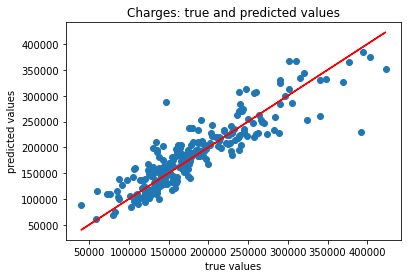

Mean absolute error of the prediction is: 21318.57448321678
Mean squared error of the prediction is: 875382850.9855301
Root mean squared error of the prediction is: 29586.869570563395
Mean absolute percentage error of the prediction is: 13.263757014716626


In [6]:
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

### 2) Using Ridge

In [7]:
from sklearn.linear_model import Ridge

In [27]:
#Adding columns that has more than 0.33 or more correlation between target variable.
chosenColumns2 = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1','1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars','Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'ExterQual_Ex', 'ExterQual_Gd', 'BsmtQual_Ex', 'KitchenQual_Ex']

y = new_house_df.SalePrice
X = new_house_df[chosenColumns2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [79]:
# Fitting a ridge regression model
ridgeregr = Ridge(alpha=10**0.05)
ridgeregr.fit(X_train, y_train)

Ridge(alpha=1.1220184543019633)

In [80]:
# We are making predictions
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

In [81]:
print("R-squared of the model in training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridgereg.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.8178109312696661
-----Test set statistics-----
R-squared of the model in test set is: -0.023518353923615898
Mean absolute error of the prediction is: 21280.875591617412
Mean squared error of the prediction is: 869344556.0766512
Root mean squared error of the prediction is: 29484.64949896219
Mean absolute percentage error of the prediction is: 13.255305822601432


### 2) Using Lasso

In [32]:
from sklearn.linear_model import Lasso

In [33]:
#Adding columns that has more than 0.33 or more correlation between target variable.
chosenColumns2 = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1','1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars','Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'ExterQual_Ex', 'ExterQual_Gd', 'BsmtQual_Ex', 'KitchenQual_Ex']

y = new_house_df.SalePrice
X = new_house_df[chosenColumns2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [86]:
lassoregr = Lasso(alpha=10**0.05)
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

In [87]:
print("R-squared of the model in training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.8178397703000132
-----Test set statistics-----
R-squared of the model in test set is: 0.7954547205494243
Mean absolute error of the prediction is: 21317.60368003429
Mean squared error of the prediction is: 875270934.0297621
Root mean squared error of the prediction is: 29584.97818200585
Mean absolute percentage error of the prediction is: 13.263459924868656


**Comment:** For both Ridge and Lasso, R-squared values are inceased while alpha getting closer to the 0.

### 3) Using ElasticNet

In [89]:
from sklearn.linear_model import ElasticNet

In [90]:
#Adding columns that has more than 0.33 or more correlation between target variable.
chosenColumns2 = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1','1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars','Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'ExterQual_Ex', 'ExterQual_Gd', 'BsmtQual_Ex', 'KitchenQual_Ex']

y = new_house_df.SalePrice
X = new_house_df[chosenColumns2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [110]:
elasticregr = ElasticNet(alpha=10**-5)
elasticregr.fit(X_train, y_train)

y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

In [111]:
print("R-squared of the model in training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.8178397931990447
-----Test set statistics-----
R-squared of the model in test set is: 0.7954357799196524
Mean absolute error of the prediction is: 21318.3826323529
Mean squared error of the prediction is: 875351982.9923981
Root mean squared error of the prediction is: 29586.347915760034
Mean absolute percentage error of the prediction is: 13.263713445026445


**Comment:** ElasticNet catches the same R-squared value for alpha equals 10^-5.  